Goal-The goal in this dataset is predicting diagnosis, and more specifically, differentiating between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy). The dataset includes information on stage of pancreatic cancer, and diagnosis for non-cancerous patients, but remember—these won't be available to a predictive model. The goal, after all, is to predict the presence of disease before it's diagnosed, not after!

In [2]:
####Importing the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
###Importing of excel data
from google.colab import files
uploaded = files.upload()

Saving Debernardi et al 2020 data.csv to Debernardi et al 2020 data.csv


In [4]:
import io
biomarker_data= pd.read_csv(io.BytesIO(uploaded['Debernardi et al 2020 data.csv']))
biomarker_data.head(20)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN
5,S103,Cohort2,BPTB,53,M,1,NaN,NaN,NaN,0.84825,0.003393,62.12600,59.793000,NaN
6,S104,Cohort2,BPTB,70,M,1,NaN,NaN,NaN,0.62205,0.174381,152.27700,117.516000,NaN
7,S105,Cohort2,BPTB,58,F,1,NaN,NaN,11.0,0.89349,0.003574,3.73000,40.294000,NaN
8,S106,Cohort2,BPTB,59,F,1,NaN,NaN,NaN,0.48633,0.001945,7.02100,26.782000,NaN
9,S107,Cohort2,BPTB,56,F,1,NaN,NaN,24.0,0.61074,0.278778,83.92800,19.185000,NaN


In [5]:
biomarker_data.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [6]:
biomarker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [7]:
####Data Cleaning process
biomarker_na = biomarker_data.drop(['stage', 'benign_sample_diagnosis'], axis=1)
biom_na= biomarker_na.dropna(axis=0)

In [8]:
biom_na.head(20)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,11.70,1.83222,0.893219,52.948840,654.282174,1262.000
19,S116,Cohort1,BPTB,28,F,1,8.70,0.50895,0.583010,13.619060,267.193539,381.000
21,S118,Cohort1,BPTB,50,F,1,8.70,0.95004,0.003800,56.399133,192.258882,137.000
27,S123,Cohort1,BPTB,45,M,1,9.60,1.35720,2.392864,28.509285,353.656656,563.000
28,S124,Cohort1,BPTB,35,M,1,4.00,0.24882,0.000995,9.245166,6.030701,624.000
29,S125,Cohort1,BPTB,30,M,1,10.80,1.18755,1.600313,22.471281,299.118360,570.000
102,S26,Cohort1,BPTB,51,M,1,6.94,0.19227,0.571181,3.099211,39.729131,0.000
103,S27,Cohort1,BPTB,44,F,1,8.47,0.18096,0.011929,2.146055,0.014115,13.616
107,S30,Cohort1,BPTB,58,F,1,13.58,0.57681,0.864248,21.571088,0.044991,65.912
108,S31,Cohort1,BPTB,49,M,1,7.86,0.32799,0.011929,6.008635,5.637440,0.000


In [9]:
biom_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       209 non-null    object 
 1   patient_cohort  209 non-null    object 
 2   sample_origin   209 non-null    object 
 3   age             209 non-null    int64  
 4   sex             209 non-null    object 
 5   diagnosis       209 non-null    int64  
 6   plasma_CA19_9   209 non-null    float64
 7   creatinine      209 non-null    float64
 8   LYVE1           209 non-null    float64
 9   REG1B           209 non-null    float64
 10  TFF1            209 non-null    float64
 11  REG1A           209 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 21.2+ KB


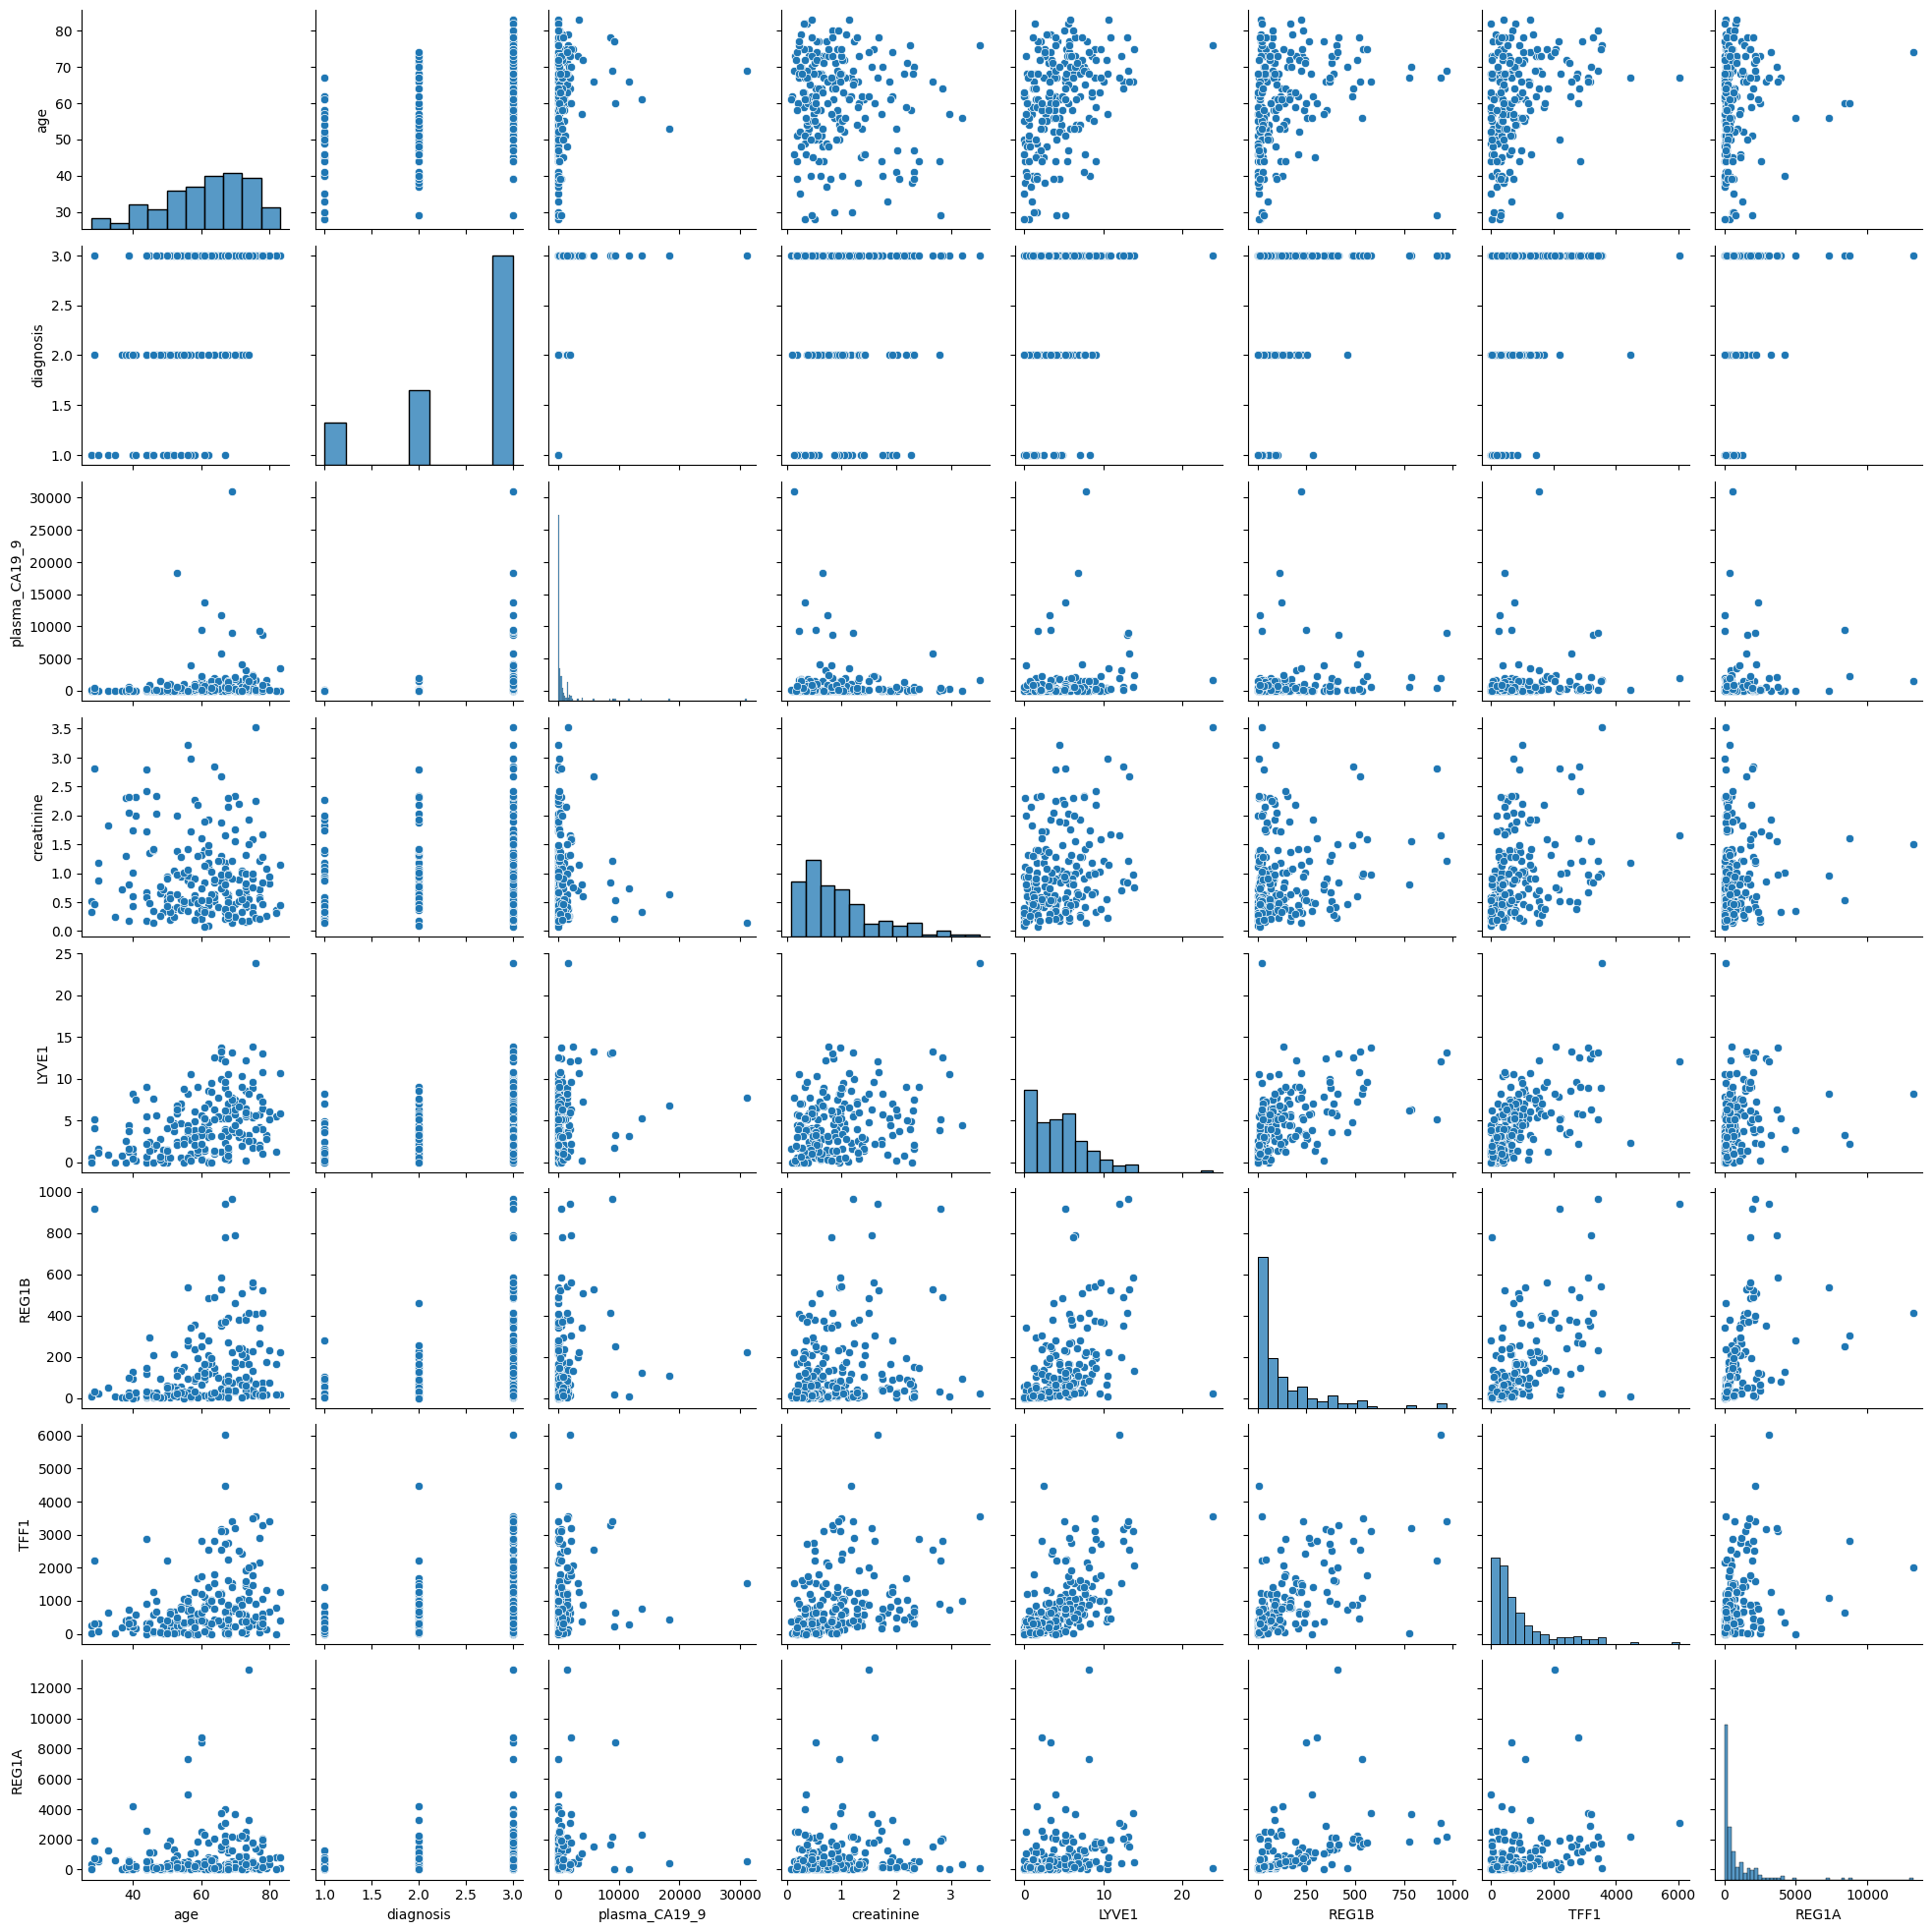

In [10]:
#### Exploratory Data Analysis and Visualization

sns.pairplot(biom_na)

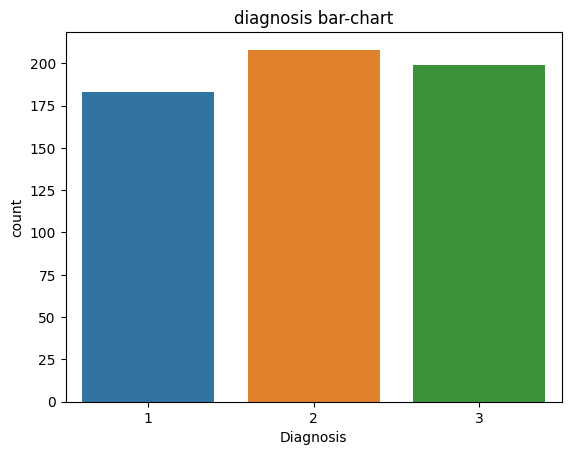

In [11]:
####Raw unclean data
sns.countplot(x='diagnosis', data=biomarker_data)
plt.xlabel('Diagnosis')
plt.title('diagnosis bar-chart')
plt.show()

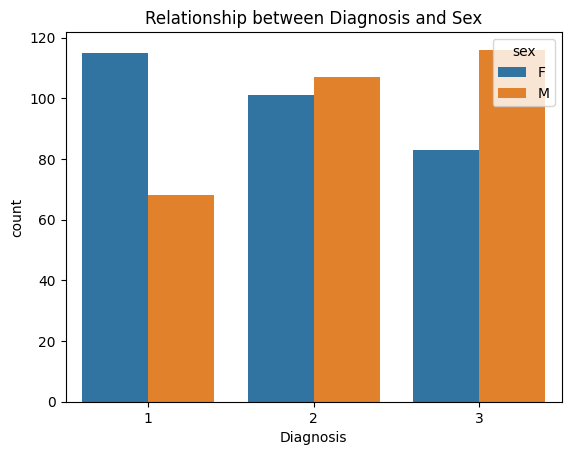

In [12]:
sns.countplot(x='diagnosis', hue= 'sex', data=biomarker_data)
plt.xlabel('Diagnosis')
plt.ylabel('count')
plt.title('Relationship between Diagnosis and Sex')
plt.show()

In [13]:
biomarker_data['diagnosis'].value_counts().to_frame()

,diagnosis
2,208
3,199
1,183


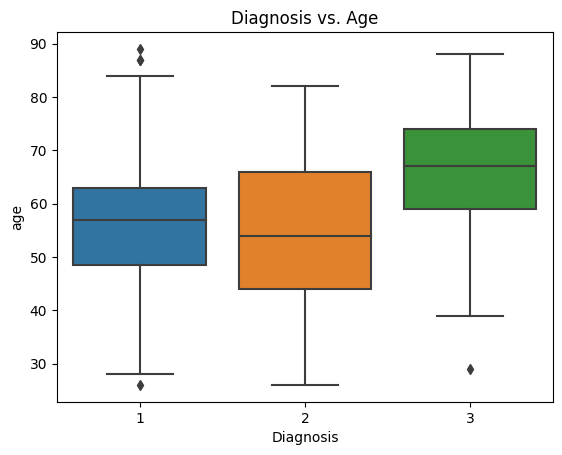

In [14]:
sns.boxplot(x='diagnosis', y='age',data=biomarker_data)
plt.xlabel('Diagnosis')
plt.ylabel('age')
plt.title('Diagnosis vs. Age')
plt.show()

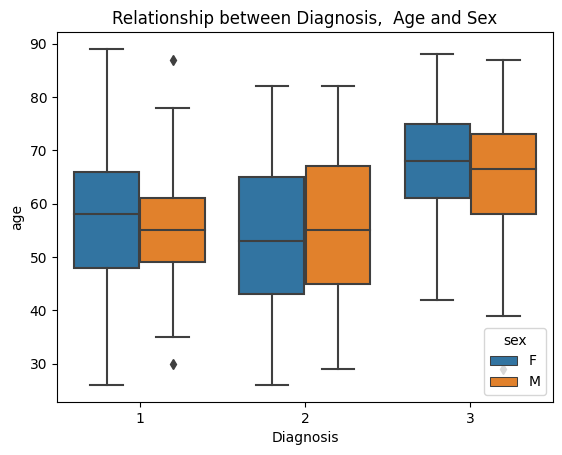

In [15]:
sns.boxplot(x='diagnosis', y='age', hue='sex',  data=biomarker_data)
plt.xlabel('Diagnosis')
plt.ylabel('age')
plt.title('Relationship between Diagnosis,  Age and Sex')
plt.show()

In [16]:
biom_na['diagnosis'].value_counts().to_frame()

,diagnosis
3,134
2,48
1,27


<Axes: xlabel='diagnosis', ylabel='count'>

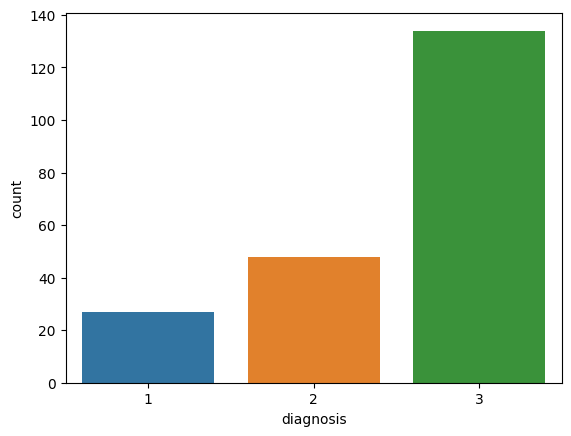

In [17]:
sns.countplot(x='diagnosis', data=biom_na)  ####after cleaning process

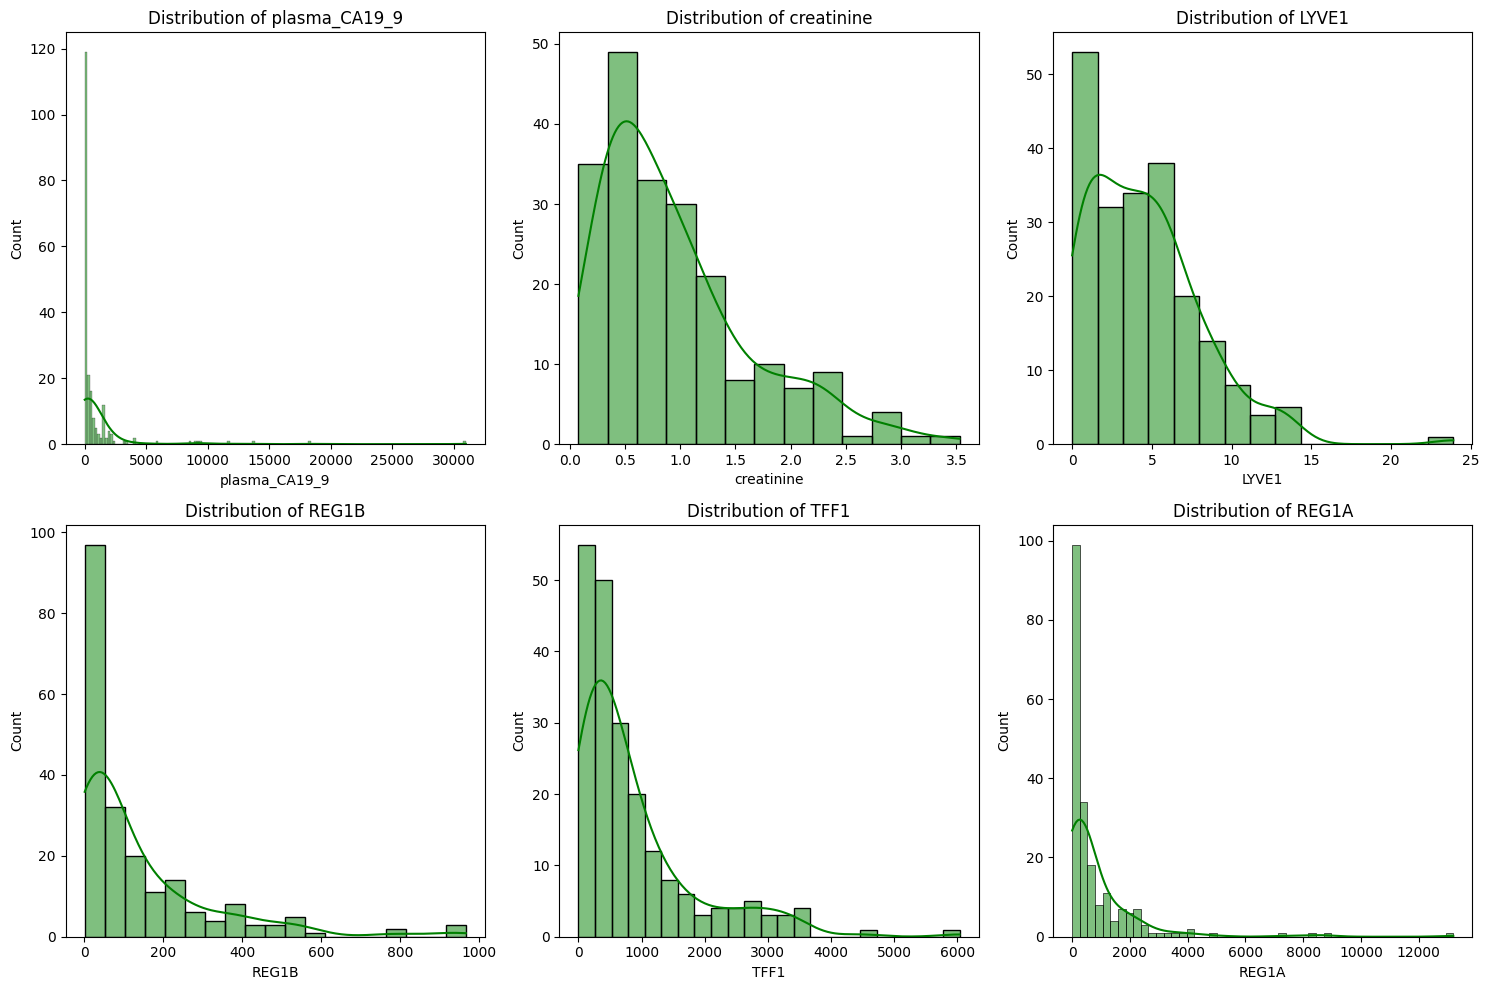

In [18]:
# Assuming your DataFrame is named biom_na
biomarkers = ['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each biomarker
for i, biomarker in enumerate(biomarkers):
    sns.histplot(biom_na[biomarker], ax=axes[i], kde=True, color='Green')
    axes[i].set_title(f'Distribution of {biomarker}')

# Adjust layout
plt.tight_layout()
plt.show()

ANOVA ANALYSIS

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
response_variable = 'plasma_CA19_9'

# Fit the ANOVA model
model = ols(f'{response_variable} ~ C(sex) + C(diagnosis) + C(sex):C(diagnosis)', data=biom_na).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
C(sex),3.038835e+06,1.0,0.336834,0.562306
C(diagnosis),9.654638e+07,2.0,5.350759,0.005437
C(sex):C(diagnosis),7.693528e+05,2.0,0.042639,0.958266
Residual,1.831415e+09,203.0,NaN,NaN


<Axes: >

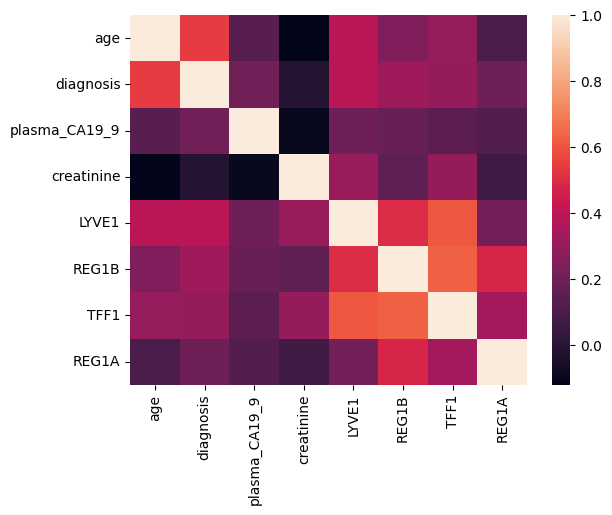

In [44]:
###Heat map for correlation
sns.heatmap(biom_ready.corr())

In [45]:
biom_ready.corr()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
age,1.000000,0.545029,0.138527,-0.119258,0.393345,0.241184,0.301886,0.103529
diagnosis,0.545029,1.000000,0.208600,-0.013170,0.396006,0.319328,0.296879,0.192905
plasma_CA19_9,0.138527,0.208600,1.000000,-0.095174,0.197541,0.181583,0.147906,0.123293
creatinine,-0.119258,-0.013170,-0.095174,1.000000,0.308224,0.159197,0.299303,0.068926
LYVE1,0.393345,0.396006,0.197541,0.308224,1.000000,0.505734,0.610733,0.213855
REG1B,0.241184,0.319328,0.181583,0.159197,0.505734,1.000000,0.626835,0.483751
TFF1,0.301886,0.296879,0.147906,0.299303,0.610733,0.626835,1.000000,0.339701
REG1A,0.103529,0.192905,0.123293,0.068926,0.213855,0.483751,0.339701,1.000000


Biavariant Analysis

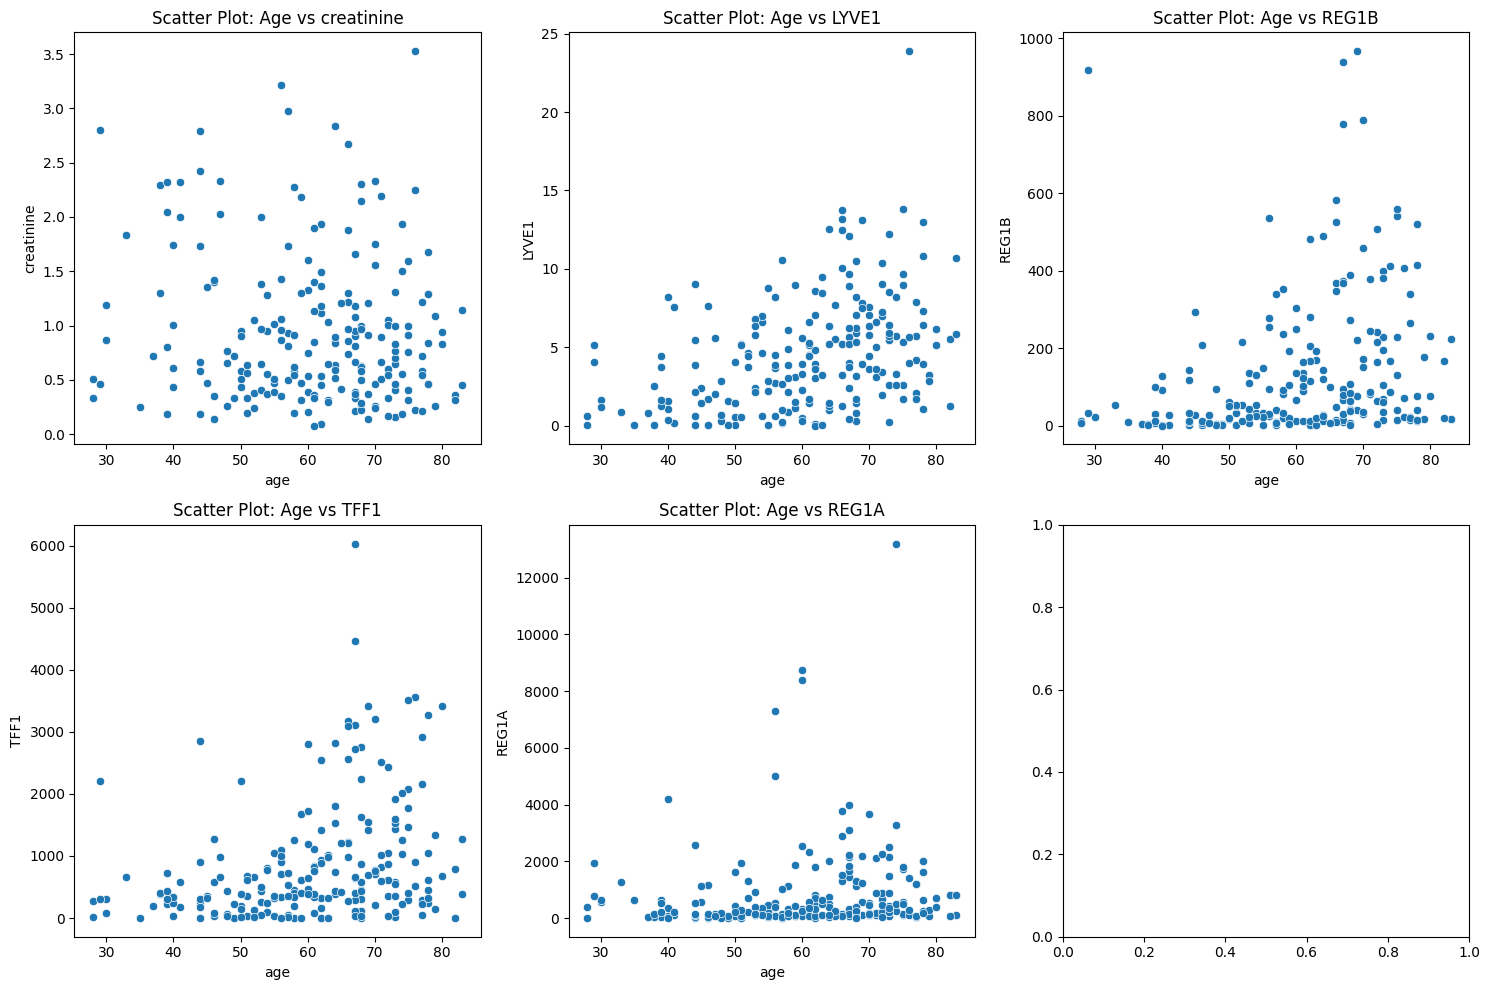

In [48]:
response_variable = 'plasma_CA19_9'

# List of biomarkers to analyze
biomarkers = ['creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot scatter plots for age versus each biomarker
for i, biomarker in enumerate(biomarkers):
    sns.scatterplot(x='age', y=biomarker, data=biom_na, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: Age vs {biomarker}')

# Adjust layout
plt.tight_layout()
plt.show()

#Machine Learning for the prediction



In [22]:
biom_na.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,11.7,1.83222,0.893219,52.948840,654.282174,1262.0
19,S116,Cohort1,BPTB,28,F,1,8.7,0.50895,0.583010,13.619060,267.193539,381.0
21,S118,Cohort1,BPTB,50,F,1,8.7,0.95004,0.003800,56.399133,192.258882,137.0
27,S123,Cohort1,BPTB,45,M,1,9.6,1.35720,2.392864,28.509285,353.656656,563.0
28,S124,Cohort1,BPTB,35,M,1,4.0,0.24882,0.000995,9.245166,6.030701,624.0


In [24]:
##### most important columns for the ML is the biomarkers and diagnosis
biom_ready= biom_na.drop(['sample_id','patient_cohort', 'sample_origin', 'sex'], axis= 1)

In [25]:
biom_ready.head()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,1,11.7,1.83222,0.893219,52.948840,654.282174,1262.0
19,28,1,8.7,0.50895,0.583010,13.619060,267.193539,381.0
21,50,1,8.7,0.95004,0.003800,56.399133,192.258882,137.0
27,45,1,9.6,1.35720,2.392864,28.509285,353.656656,563.0
28,35,1,4.0,0.24882,0.000995,9.245166,6.030701,624.0


In [26]:
from sklearn.model_selection import train_test_split        ##### importing train test split

In [27]:
X = biom_ready.drop(columns=['diagnosis'])  # Features (independent variables)
y = biom_ready['diagnosis']  # Target variable

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((167, 7), (42, 7), (167,), (42,))

In [30]:
biom_ready.shape

(209, 8)

In [31]:
#### Using a random forest
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc= RandomForestClassifier(n_estimators=200)

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
rfc_prediction= rfc.predict(X_test)

In [35]:
#usinf random forest of classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction))

[[ 2  2  1]
 [ 0  3  4]
 [ 1  1 28]]
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.50      0.43      0.46         7
           3       0.85      0.93      0.89        30

    accuracy                           0.79        42
   macro avg       0.67      0.59      0.62        42
weighted avg       0.77      0.79      0.77        42



In [37]:
print(accuracy_score(y_test, rfc_prediction))

0.7857142857142857


#Building a predictive model

In [38]:
inpute_data=(33, 11.7,	1.83222,	0.893219,	52.948840,	654.282174,	1262.0)



In [39]:
inputeas_array= np.asarray(inpute_data)

In [40]:
inpute_reshape= inputeas_array.reshape(1,-1)

In [41]:
inpute_reshape

array([[3.30000000e+01, 1.17000000e+01, 1.83222000e+00, 8.93219000e-01,
        5.29488400e+01, 6.54282174e+02, 1.26200000e+03]])

In [42]:
Predictive_diagnosis= rfc.predict(inpute_reshape)
print(Predictive_diagnosis)
######
if Predictive_diagnosis== 1:
  print('The Patience have low risk of Pancreatic cancer and pancreatic related disease')
elif Predictive_diagnosis== 2:
  print('The patience is having higer risk of other pancreatic disease, but likely not pancreative cancer')
elif Predictive_diagnosis==3:
  print('Patience is having higher risk of pancreatic Cancer')
else:
  print('Not Applicable')

[1]
The Patience have low risk of Pancreatic cancer and pancreatic related disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
